# SETTING it up 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import  r2_score
from sklearn.model_selection import  train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import GridSearchCV
from scipy.stats import skew
from sklearn.pipeline import Pipeline



%matplotlib inline

from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso, ElasticNetCV
from sklearn.model_selection import cross_val_score



from sklearn.preprocessing import PolynomialFeatures








In [2]:
train = pd.read_csv('./datasets/ames_training.csv')

test = pd.read_csv('./datasets/ames_test.csv')

In [3]:
train_ID = train['Id']
test_ID = test['Id']

In [4]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
All = pd.concat((train, test)).reset_index(drop=True)
All.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(All.shape))

All.columns = [x.replace(' ', '') for x in All.columns]

all_data size is : (2919, 80)


/Users/richardmason/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


# First Impressions 

In [5]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

## Doing some feature engineering





In [9]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [10]:
All["PoolQC"] = All["PoolQC"].fillna("None")

All["MiscFeature"] = All["MiscFeature"].fillna("None")

All["Alley"] = All["Alley"].fillna("None")

All["Fence"] = All["Fence"].fillna("None")

All["FireplaceQu"] = All["FireplaceQu"].fillna("None")

All["LotFrontage"] = All.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

All['GarageYrBlt'] = All['GarageYrBlt'].fillna(All['GarageYrBlt'].mode()[0])

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    All[col] = All[col].fillna('None')

for col in ('GarageArea', 'GarageCars'):
    All[col] = All[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    All[col] = All[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    All[col] = All[col].fillna('None')

All["MasVnrType"] = All["MasVnrType"].fillna("None")
All["MasVnrArea"] = All["MasVnrArea"].fillna(0)

All['MSZoning'] = All['MSZoning'].fillna(All['MSZoning'].mode()[0])

All = All.drop(['Utilities'], axis=1)

All["Functional"] = All["Functional"].fillna("Typ")

All['Electrical'] = All['Electrical'].fillna(All['Electrical'].mode()[0])

All['KitchenQual'] = All['KitchenQual'].fillna(All['KitchenQual'].mode()[0])

All['Exterior1st'] = All['Exterior1st'].fillna(All['Exterior1st'].mode()[0])
All['Exterior2nd'] = All['Exterior2nd'].fillna(All['Exterior2nd'].mode()[0])

All['SaleType'] = All['SaleType'].fillna(All['SaleType'].mode()[0])

All['MSSubClass'] = All['MSSubClass'].fillna("None")

#Check remaining missing values if any 
All_na = (All.isnull().sum() / len(All)) * 100
All_na = All_na.drop(All_na[All_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :All_na})
missing_data.head()

All['LotFrontage'] = All['LotFrontage'].fillna(All['LotFrontage'].median())

#MSSubClass=The building class
All['MSSubClass'] = All['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
All['OverallCond'] = All['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
All['YrSold'] = All['YrSold'].astype(str)
All['MoSold'] = All['MoSold'].astype(str)

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(All[c].values)) 
    All[c] = lbl.transform(list(All[c].values))

# shape        
print('Shape All: {}'.format(All.shape))

All['TotalSF'] = All['TotalBsmtSF'] + All['1stFlrSF'] + All['2ndFlrSF']
All.drop(columns = 'Id', axis = 1)

Shape All: (2919, 79)


1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr BldgType  BsmtCond  \
0          856       854          0      1             3     1Fam         4   
1         1262         0          0      1             3     1Fam         4   
2          920       866          0      1             3     1Fam         4   
3          961       756          0      1             3     1Fam         1   
4         1145      1053          0      1             4     1Fam         4   
5          796       566        320      1             1     1Fam         4   
6         1694         0          0      1             3     1Fam         4   
7         1107       983          0      1             3     1Fam         4   
8         1022       752          0      1             2     1Fam         4   
9         1077         0          0      1             2   2fmCon         4   
10        1040         0          0      1             3     1Fam         4   
11        1182      1142          0      1             4     1Fam         4   
12         912         0          0      1             2     1Fam         4   
13        1494         0          0      1             3     1Fam         4   
14        1253         0          0      1             2     1Fam         4   
15         854         0          0      1             2     1Fam         4   
16        1004         0          0      1             2     1Fam         4   
17        1296         0          0      1             2   Duplex         2   
18        1114         0          0      1             3     1Fam         4   
19        1339         0          0      1             3     1Fam         4   
20        1158      1218          0      1             4     1Fam         4   
21        1108         0          0      0             3     1Fam         4   
22        1795         0          0      1             3     1Fam         4   
23        1060         0          0      1             3   TwnhsE         4   
24        1060         0          0      1             3     1Fam         4   
25        1600         0          0      1             3     1Fam         4   
26         900         0          0      1             3     1Fam         4   
27        1704         0          0      1             3     1Fam         4   
28        1600         0          0      1             2     1Fam         4   
29         520         0          0      1             1     1Fam         4   
...        ...       ...        ...    ...           ...      ...       ...   
2889       641         0          0      1             2     1Fam         4   
2890       967       671          0      1             4     1Fam         4   
2891       729         0          0      1             2     1Fam         2   
2892      1060       336          0      1             4   2fmCon         4   
2893       576       360          0      1             2     1Fam         0   
2894      1778         0          0      1             2   TwnhsE         4   
2895      1646         0          0      1             2   TwnhsE         4   
2896      1625         0          0      1             3     1Fam         4   
2897      1664         0          0      1             4   Duplex         4   
2898      1491         0          0      1             3     1Fam         4   
2899      1210         0          0      1             3     1Fam         4   
2900      1650         0          0      1             2     1Fam         4   
2901      1403         0          0      1             2     1Fam         4   
2902      1960         0          0      1             3     1Fam         1   
2903      1838         0          0      1             3     1Fam         4   
2904      1600         0          0      1             3     1Fam         2   
2905      1368         0          0      1             2   Duplex         4   
2906       616       688          0      1             3   TwnhsE         4   
2907       874         0          0      1             3

In [11]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null int64
BsmtExposure     2919 non-null int64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null int64
BsmtFinType2     2919 non-null int64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null int64
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null int64
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null int64
ExterQual        2919 non-null int64
Exterior1st      2919 non-nu

In [12]:
numeric_feats = All.select_dtypes(exclude = 'object')

# Transform skewed numerical features, to eliminate the effect of outliers

In [13]:
# Check the skew of all numerical features
skewed_feats = numeric_feats
skewed_feats = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



Skew
MiscVal        21.947195
PoolArea       16.898328
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
LandSlope       4.975157
KitchenAbvGr    4.302254
BsmtFinSF2      4.146143
EnclosedPorch   4.003891
ScreenPorch     3.946694
BsmtHalfBath    3.931594
MasVnrArea      2.613592
OpenPorchSF     2.535114
WoodDeckSF      1.842433
TotalSF         1.511479
LotFrontage     1.505704
1stFlrSF        1.469604
BsmtFinSF1      1.425230
GrLivArea       1.269358
TotalBsmtSF     1.156894
BsmtUnfSF       0.919339
2ndFlrSF        0.861675
TotRmsAbvGrd    0.758367
Fireplaces      0.733495
HalfBath        0.694566
BsmtFullBath    0.624832
OverallCond     0.570312
HeatingQC       0.486656
FireplaceQu     0.333787
BedroomAbvGr    0.326324
GarageArea      0.239257
OverallQual     0.197110
FullBath        0.167606
MSSubClass      0.138396
YrSold          0.132399
BsmtFinType1    0.084633
Id              0.000000
GarageCars     -0.219581
YearRemodAdd   -0.451020
GarageYrBlt    -0.468511
BsmtQual       -0.488273
YearBuilt      -0.599806
GarageFinish   -0.608033
LotShape       -0.617690
MoSold         -0.645257
Alley          -0.652040
BsmtExposure   -1.114856
KitchenQual    -1.448023
ExterQual      -1.801409
Fence          -1.993777
ExterCond      -2.497719
BsmtCond       -2.862585
PavedDrive     -2.979084
BsmtFinType2   -3.044328
GarageQual     -3.074152
CentralAir     -3.459022
GarageCond     -3.595790
Functional     -4.055757
Street        -15.500133
PoolQC        -20.723994

In [14]:
skewness = skewness[abs(skewness) > 0.5]

In [15]:
skewness

Skew
MiscVal        21.947195
PoolArea       16.898328
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
LandSlope       4.975157
KitchenAbvGr    4.302254
BsmtFinSF2      4.146143
EnclosedPorch   4.003891
ScreenPorch     3.946694
BsmtHalfBath    3.931594
MasVnrArea      2.613592
OpenPorchSF     2.535114
WoodDeckSF      1.842433
TotalSF         1.511479
LotFrontage     1.505704
1stFlrSF        1.469604
BsmtFinSF1      1.425230
GrLivArea       1.269358
TotalBsmtSF     1.156894
BsmtUnfSF       0.919339
2ndFlrSF        0.861675
TotRmsAbvGrd    0.758367
Fireplaces      0.733495
HalfBath        0.694566
BsmtFullBath    0.624832
OverallCond     0.570312
HeatingQC            NaN
FireplaceQu          NaN
BedroomAbvGr         NaN
GarageArea           NaN
OverallQual          NaN
FullBath             NaN
MSSubClass           NaN
YrSold               NaN
BsmtFinType1         NaN
Id                   NaN
GarageCars           NaN
YearRemodAdd         NaN
GarageYrBlt          NaN
BsmtQual             NaN
YearBuilt      -0.599806
GarageFinish   -0.608033
LotShape       -0.617690
MoSold         -0.645257
Alley          -0.652040
BsmtExposure   -1.114856
KitchenQual    -1.448023
ExterQual      -1.801409
Fence          -1.993777
ExterCond      -2.497719
BsmtCond       -2.862585
PavedDrive     -2.979084
BsmtFinType2   -3.044328
GarageQual     -3.074152
CentralAir     -3.459022
GarageCond     -3.595790
Functional     -4.055757
Street        -15.500133
PoolQC        -20.723994

In [16]:
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 60 skewed numerical features to Box Cox transform


In [17]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    print(feat)
    All[feat] += 1
    print(All[feat])
    All[feat] = boxcox1p(All[feat], lam)
    
#All[skewed_features] = np.log1p(All[skewed_features])

MiscVal
0         1
1         1
2         1
3         1
4         1
5       701
6         1
7       351
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16      701
17      501
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
       ... 
2889      1
2890      1
2891      1
2892      1
2893      1
2894      1
2895      1
2896      1
2897      1
2898      1
2899      1
2900      1
2901      1
2902      1
2903      1
2904      1
2905      1
2906      1
2907      1
2908      1
2909      1
2910      1
2911      1
2912      1
2913      1
2914      1
2915      1
2916      1
2917    701
2918      1
Name: MiscVal, Length: 2919, dtype: int64
PoolArea
0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1

BsmtFinType1
0       3
1       1
2       3
3       1
4       3
5       3
6       3
7       1
8       7
9       3
10      6
11      3
12      1
13      7
14      2
15      7
16      1
17      5
18      3
19      4
20      7
21      7
22      7
23      3
24      6
25      7
26      2
27      3
28      2
29      7
       ..
2889    7
2890    7
2891    5
2892    7
2893    7
2894    3
2895    3
2896    3
2897    7
2898    7
2899    3
2900    2
2901    3
2902    3
2903    3
2904    5
2905    3
2906    7
2907    1
2908    2
2909    3
2910    6
2911    6
2912    6
2913    7
2914    7
2915    6
2916    1
2917    3
2918    4
Name: BsmtFinType1, Length: 2919, dtype: int64
Id
0          2
1          3
2          4
3          5
4          6
5          7
6          8
7          9
8         10
9         11
10        12
11        13
12        14
13        15
14        16
15        17
16        18
17        19
18        20
19        21
20        22
21        23
22        24
23        25
24        26
25

In [18]:
skewness

Skew
MiscVal        21.947195
PoolArea       16.898328
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
LandSlope       4.975157
KitchenAbvGr    4.302254
BsmtFinSF2      4.146143
EnclosedPorch   4.003891
ScreenPorch     3.946694
BsmtHalfBath    3.931594
MasVnrArea      2.613592
OpenPorchSF     2.535114
WoodDeckSF      1.842433
TotalSF         1.511479
LotFrontage     1.505704
1stFlrSF        1.469604
BsmtFinSF1      1.425230
GrLivArea       1.269358
TotalBsmtSF     1.156894
BsmtUnfSF       0.919339
2ndFlrSF        0.861675
TotRmsAbvGrd    0.758367
Fireplaces      0.733495
HalfBath        0.694566
BsmtFullBath    0.624832
OverallCond     0.570312
HeatingQC            NaN
FireplaceQu          NaN
BedroomAbvGr         NaN
GarageArea           NaN
OverallQual          NaN
FullBath             NaN
MSSubClass           NaN
YrSold               NaN
BsmtFinType1         NaN
Id                   NaN
GarageCars           NaN
YearRemodAdd         NaN
GarageYrBlt          NaN
BsmtQual             NaN
YearBuilt      -0.599806
GarageFinish   -0.608033
LotShape       -0.617690
MoSold         -0.645257
Alley          -0.652040
BsmtExposure   -1.114856
KitchenQual    -1.448023
ExterQual      -1.801409
Fence          -1.993777
ExterCond      -2.497719
BsmtCond       -2.862585
PavedDrive     -2.979084
BsmtFinType2   -3.044328
GarageQual     -3.074152
CentralAir     -3.459022
GarageCond     -3.595790
Functional     -4.055757
Street        -15.500133
PoolQC        -20.723994

In [19]:
All.head()

1stFlrSF   2ndFlrSF  3SsnPorch     Alley  BedroomAbvGr BldgType  BsmtCond  \
0  11.695834  11.689408   0.730463  1.194318      1.820334     1Fam  2.055642   
1  12.794586   0.730463   0.730463  1.194318      1.820334     1Fam  2.055642   
2  11.895060  11.727779   0.730463  1.194318      1.820334     1Fam  2.055642   
3  12.016594  11.357663   0.730463  1.194318      1.820334     1Fam  1.194318   
4  12.513097  12.274059   0.730463  1.194318      2.055642     1Fam  2.055642   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2    ...      SaleType  ScreenPorch  \
0      1.820334   11.174109    0.730463    ...            WD     0.730463   
1      1.194318   12.065700    0.730463    ...            WD     0.730463   
2      1.540963   10.205533    0.730463    ...            WD     0.730463   
3      1.820334    8.284573    0.730463    ...            WD     0.730463   
4      0.730463   10.975160    0.730463    ...            WD     0.730463   

     Street  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  YearBuilt YearRemodAdd  \
0  1.194318      2.750250    11.695834    0.730463  14.189087    14.189087   
1  1.194318      2.440268    12.794586    9.018059  14.146717    14.146717   
2  1.194318      2.440268    11.895060    0.730463  14.185966    14.187527   
3  1.194318      2.602594    11.357663    0.730463  14.049150    14.137234   
4  1.194318      2.885846    12.513097    8.025268  14.184404    14.184404   

     YrSold    TotalSF  
0  1.540963  14.977855  
1  1.194318  14.924382  
2  1.540963  15.150886  
3  0.730463  14.858426  
4  1.540963  15.853322  

[5 rows x 80 columns]

## Transform categorical variables with pd.get_dummies, and seperate back out train from test

In [20]:
All = pd.get_dummies(All)
print(All.shape)

train = All[:ntrain]
test = All[ntrain:]

train.shape

test.shape

(2919, 222)


(1459, 222)

## Drop saleprice from train

In [21]:
y = pd.DataFrame(data = y_train)

In [22]:
train['SalePrice'] = y

/Users/richardmason/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 223 entries, 1stFlrSF to SalePrice
dtypes: float64(60), int64(1), uint8(162)
memory usage: 926.8 KB


In [24]:
test.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Columns: 222 entries, 1stFlrSF to SaleType_WD
dtypes: float64(60), uint8(162)
memory usage: 914.8 KB


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 223 entries, 1stFlrSF to SalePrice
dtypes: float64(60), int64(1), uint8(162)
memory usage: 926.8 KB


In [26]:
train.drop(columns='SalePrice', inplace=True)

/Users/richardmason/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
train.head()

1stFlrSF   2ndFlrSF  3SsnPorch     Alley  BedroomAbvGr  BsmtCond  \
0  11.695834  11.689408   0.730463  1.194318      1.820334  2.055642   
1  12.794586   0.730463   0.730463  1.194318      1.820334  2.055642   
2  11.895060  11.727779   0.730463  1.194318      1.820334  2.055642   
3  12.016594  11.357663   0.730463  1.194318      1.820334  1.194318   
4  12.513097  12.274059   0.730463  1.194318      2.055642  2.055642   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1     ...       \
0      1.820334   11.174109    0.730463      1.540963     ...        
1      1.194318   12.065700    0.730463      0.730463     ...        
2      1.540963   10.205533    0.730463      1.540963     ...        
3      1.820334    8.284573    0.730463      0.730463     ...        
4      0.730463   10.975160    0.730463      1.540963     ...        

   SaleCondition_Partial  SaleType_COD  SaleType_CWD  SaleType_Con  \
0                      0             0             0             0   
1                      0             0             0             0   
2                      0             0             0             0   
3                      0             0             0             0   
4                      0             0             0             0   

   SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0               0               0               0             0             0   
1               0               0               0             0             0   
2               0               0               0             0             0   
3               0               0               0             0             0   
4               0               0               0             0             0   

   SaleType_WD  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 222 columns]

In [62]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(train, np.log(y))

In [63]:

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [64]:
# Model #1: Linear regression including all features
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Linear regression R^2 on the training set is: {}".format(lr.score(X_train, y_train)))
print("Linear regression R^2 on the test set is: {}".format(lr.score(X_test, y_test)))

pd.DataFrame({"Feature":train.columns, 
              "Coefficient": lr.coef_[0]})

# Since the performance is so much worst on the test set, it's safe to say our model suffers from high variance

Linear regression R^2 on the training set is: 0.9412090411940728
Linear regression R^2 on the test set is: -1.3134682025172835e+21


Feature   Coefficient
0                 1stFlrSF -3.240021e-02
1                 2ndFlrSF -2.878027e-02
2                3SsnPorch  3.622717e-04
3                    Alley -8.312662e-04
4             BedroomAbvGr -9.065714e-03
5                 BsmtCond  3.743414e-03
6             BsmtExposure -5.784932e-03
7               BsmtFinSF1  2.024654e-02
8               BsmtFinSF2 -8.397511e-03
9             BsmtFinType1  2.888794e-03
10            BsmtFinType2 -1.584482e-03
11            BsmtFullBath  1.759986e-02
12            BsmtHalfBath  8.092980e-04
13                BsmtQual -1.841834e-02
14               BsmtUnfSF -1.924293e-02
15              CentralAir  1.011305e-02
16           EnclosedPorch  3.322040e-03
17               ExterCond  2.588474e-03
18               ExterQual -9.718604e-03
19                   Fence  2.218215e-03
20             FireplaceQu  1.169155e-03
21              Fireplaces  1.151830e-02
22                FullBath  1.304630e-02
23              Functional  2.131083e-02
24              GarageArea  1.232238e-02
25              GarageCars  3.021462e-02
26              GarageCond  5.642487e-03
27            GarageFinish -3.694296e-03
28              GarageQual  8.346378e-04
29             GarageYrBlt  5.782094e-04
..                     ...           ...
192   Neighborhood_Veenker -2.948403e+09
193       RoofMatl_ClyTile  5.885990e+09
194       RoofMatl_CompShg  2.477736e+10
195       RoofMatl_Membran  5.885990e+09
196         RoofMatl_Metal  5.885990e+09
197          RoofMatl_Roll  5.885990e+09
198       RoofMatl_Tar&Grv  1.313739e+10
199       RoofMatl_WdShake  1.175583e+10
200       RoofMatl_WdShngl  1.313739e+10
201         RoofStyle_Flat -3.675651e+09
202        RoofStyle_Gable -1.910769e+10
203      RoofStyle_Gambrel -4.163964e+09
204          RoofStyle_Hip -1.841615e+10
205      RoofStyle_Mansard -3.109346e+09
206         RoofStyle_Shed -1.969227e+09
207  SaleCondition_Abnorml -8.667267e+09
208  SaleCondition_AdjLand -1.761353e+09
209   SaleCondition_Alloca -3.042360e+09
210   SaleCondition_Family -3.916805e+09
211   SaleCondition_Normal -1.301970e+10
212  SaleCondition_Partial -9.484975e+09
213           SaleType_COD -6.845724e+09
214           SaleType_CWD -2.006745e+09
215           SaleType_Con -1.639250e+09
216         SaleType_ConLD -3.269489e+09
217         SaleType_ConLI -2.006745e+09
218         SaleType_ConLw -2.006745e+09
219           SaleType_New -1.070275e+10
220           SaleType_Oth -1.639250e+09
221            SaleType_WD -1.320024e+10

[222 rows x 2 columns]

In [65]:
# Model 2, Ridge regression(ridge regularization)
alphas = np.linspace(0.001, 1000, 30)

alphas

cross_val_scores = []
test_scores = []
train_scores = []
cv = list(np.linspace(3,10, 7))
best_score = 0
for alpha in alphas:

    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    cross_val_scores.append(cross_val_score(ridge, X_train, y_train, cv = 5).mean())
    test_scores.append(ridge.score(X_test, y_test))
    if cross_val_score(ridge, X_train, y_train, cv = 10).mean() > best_score:

        best_alpha = alpha
        best_score = cross_val_score(ridge, X_train, y_train, cv = 10).mean()

    

In [66]:
    
    

ridge = Ridge(alpha = best_alpha)
ridge.fit(X_train, y_train)
y_preds = ridge.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_preds, y_test))
print('train score: ', ridge.score(X_train, y_train))
print('cross_val_score: ', cross_val_score(ridge, X_train, y_train, cv = 10).mean())
print('test score: ', ridge.score(X_test, y_test))
print('RMSE: ', RMSE)
print('Best alpha: ', best_alpha)

train score:  0.9303433182154051
cross_val_score:  0.875240543842122
test score:  0.9343829450024532
RMSE:  0.10429338105056764
Best alpha:  310.3455172413793


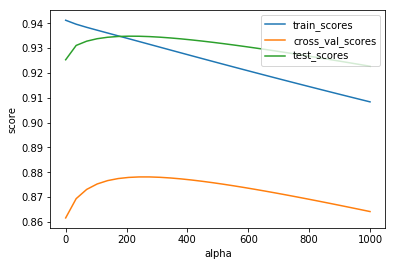

In [67]:
plt.plot(alphas, train_scores, label = 'train_scores')
plt.plot(alphas, cross_val_scores, label = 'cross_val_scores')
plt.plot(alphas, test_scores, label = 'test_scores')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend(loc = 'upper right');

In [68]:
pd.DataFrame({"Feature":train.columns, 
              "Coefficient": ridge.coef_[0]}).sort_values('Coefficient', ascending =False)

Feature  Coefficient
59                 TotalSF     0.043086
30               GrLivArea     0.041907
47             OverallQual     0.041814
0                 1stFlrSF     0.030455
46             OverallCond     0.029554
37                 LotArea     0.025131
25              GarageCars     0.024074
184   Neighborhood_NridgHt     0.021326
22                FullBath     0.020147
7               BsmtFinSF1     0.018538
57            YearRemodAdd     0.018087
21              Fireplaces     0.017473
174   Neighborhood_Crawfor     0.017128
53            TotRmsAbvGrd     0.016902
23              Functional     0.016554
56               YearBuilt     0.016287
183   Neighborhood_NoRidge     0.015763
11            BsmtFullBath     0.015715
54             TotalBsmtSF     0.015073
190   Neighborhood_StoneBr     0.014737
90     Exterior1st_BrkFace     0.013462
24              GarageArea     0.013192
15              CentralAir     0.013110
31                HalfBath     0.011623
1                 2ndFlrSF     0.011350
200       RoofMatl_WdShngl     0.010630
51             ScreenPorch     0.010300
55              WoodDeckSF     0.009558
120       Foundation_PConc     0.008918
38             LotFrontage     0.008879
..                     ...          ...
151          LotConfig_FR2    -0.005772
50                  PoolQC    -0.005788
182    Neighborhood_NWAmes    -0.006001
187    Neighborhood_Sawyer    -0.006148
180     Neighborhood_NAmes    -0.006229
177    Neighborhood_IDOTRR    -0.006340
176   Neighborhood_Gilbert    -0.006392
70         Condition1_RRAe    -0.006438
158            MSZoning_RM    -0.006463
6             BsmtExposure    -0.006720
179   Neighborhood_Mitchel    -0.006750
27            GarageFinish    -0.007294
100    Exterior1st_Wd Sdng    -0.007508
14               BsmtUnfSF    -0.007766
221            SaleType_WD    -0.007787
65       Condition1_Artery    -0.008429
185   Neighborhood_OldTown    -0.009363
118      Foundation_BrkTil    -0.009439
178   Neighborhood_MeadowV    -0.009626
34            KitchenAbvGr    -0.009816
89     Exterior1st_BrkComm    -0.010622
207  SaleCondition_Abnorml    -0.011366
18               ExterQual    -0.012753
32               HeatingQC    -0.013520
175   Neighborhood_Edwards    -0.013566
35             KitchenQual    -0.015062
78         Condition2_PosN    -0.017165
13                BsmtQual    -0.018543
154       MSZoning_C (all)    -0.028211
193       RoofMatl_ClyTile    -0.035194

[222 rows x 2 columns]

In [70]:
# Submitting to kaggle


ss = StandardScaler()
test = ss.fit_transform(test)

# Submitting to kaggle
preds = ridge.predict(test)

In [72]:
preds = np.exp(preds)

In [88]:
preds = preds.flatten()

In [89]:
kaggle = pd.DataFrame({'Id':test_ID,
                      'SalePrice': preds})

In [91]:
kaggle_ames = kaggle.to_csv('./kaggle_submission.csv', index = False)

In [ ]:
# adding in polynomial features 
